# Proyecto 13

Este proyecto tiene como objetivo demostrar las habilidades durante el sprint 13 **Introducción a pronósticos y predicciones**, para ello se realiza el ejercicio de analizar los datos aportados por la cadena de gimnasios "Model Fitness" donde se busca predecir la probabilidad de pérdida de clientes, elaborar retratos de usuarios típicos y analizar los impactos en las pérdidas de clientes, con el fin de identificar grupos objetivo y sugerir estrategias para reducir la rotación y mejorar la interacción con la clientela. 

## Metodología.

Para el desarrollo de este proyecto se deben seguir una serie de pasos que nos permitirán alcanzar el objetivo deseado.

- **Preparación de los datos**: En esta sección se toman los datos en "limpio" (sin modificaciones), se hace un análisis preliminar para conocer los datos y a partir de ahí, se toma la decisión de las modificaciones más convenientes que eliminen posibles errores y faciliten los siguientes pasos.

- **Análisis exploratorio de datos**: En esta sección se obtendrá información sobre el conjunto de datos que se nos presenta como: características ausentes, el comportamiento de las características para los usuarios que cancelaron y las que aún mantienen su membrecia, la correlación de las características presentes. 

- **Construcción del modelo de predicción**: En esta sección se desarrolla un modelo de clasificación binaria para clientes cuya característica objetivo es si el usuario/usuaria cancela su suscripción el mes siguiente. Se entrenarán dos tipos de modelos: regresión logística y bosque aleatorio, y se realiza el análisis de métricas para determinar el que sea más adecuado.

- **Identificación de grupos**: En esta sección se busca crear e identificar clústeres de datos mediante el algoritmo K-means, posteriormente se realiza el análisis para determinar qué grupos son propensos a cancelar su suscripción.


## Preparación de los datos. 
Como primer acercamiento debemos conocer los conjuntos de datos que se nos proporcionan para tomar las medidas más convenientes que nos permitan hacer los arreglos necesarios de forma que los elementos e información del dataset sea la más adecuada para hacer el análisis sin mayor problema. 

Para lograr esto debemos seguir los siguientes pasos:
1. Comprensión general del dataset.
2. Tratamiento de valores ausentes.
3. Valores duplicados.
4. Procesamiento de datos.

Se comienza el trabajo al importar las librerias necesarias y leer los archivos de datos para construir el dataframe mediante Pandas.

In [1]:
#Importamos librerias a utilizar
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Cargamos los datos proporcionados
data = pd.read_csv('/datasets/gym_churn_us.csv')

### Comprensión general de los datos

El dataset 'gym_churn_us' contiene información sobre la cancelación de los usuarios en el mes actual e información del mes que lo precedía, así como el registro de visitas, compras y datos sobre el estado de su membresía. A continuación mostramos información del dataset.

In [3]:
#Mostramos muestra e información general

print(data.info())#Información general
display(data.head(5)) #mostramos primeras 5 lineas
print("Valores únicos en cada columna:\n",data.nunique()) #Número de valores únicos en cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Valores únicos en cada columna:
 gender                                  2
Near_Location                           2
Partner                                 2
Promo_friends                           2
Phone                                   2
Contract_period                         3
Group_visits                            2
Age                                    23
Avg_additional_charges_total         4000
Month_to_end_contract                  12
Lifetime                               29
Avg_class_frequency_total            3913
Avg_class_frequency_current_month    3820
Churn                                   2
dtype: int64


La información se nos presenta en 14 columnas: 
- **gender**: 
    - Descripción: Género del usuario
    - Tipo de dato: Entero, se asigna un 0 o 1 dependiendo del género. No se especifica cuál corresponde al masculino o al femenino.
    - Valores únicos: 2, por lo que no hay presencia de errores. 
- **Near_Location**: 
    - Descripción: Indica si el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio.
    - Tipo de dato: Entero, se asigna un 0 o 1 dependiendo si la respuesta es afirmativa o no.
    - Valores únicos: 2, por lo que no hay presencia de errores. 
- **Partner**: 
    - Descripción: Indica si el usuario trabaja en una compañía asociada a la empresa del gimnasio para otorgar descuentos. 
    - Tipo de dato: Entero, se asigna un 0 o 1 dependiendo si la respuesta es afirmativa o no.
    - Valores únicos: 2, por lo que no hay presencia de errores.
- **Promo_friends**: 
    - Descripción: Indica si el usuario originalmente se inscribió mediante una oferta "Trae a un amigo" utilizando un código promocional al momento de pagar el primer abono. 
    - Tipo de dato: Entero, se asigna un 0 o 1 dependiendo si la respuesta es afirmativa o no.
    - Valores únicos: 2, por lo que no hay presencia de errores. 
- **Phone**: 
    - Descripción: Indica si el usuario aportó su número de teléfono. 
    - Tipo de dato: Entero, se asigna un 0 o 1 dependiendo si la respuesta es afirmativa o no.
    - Valores únicos: 2, por lo que no hay presencia de errores. 
- **Contract_period**: 
    - Descripción: Indica la duración del contrato que tiene el usuario. 
    - Tipo de dato: Entero, se indica el número de meses. 
    - Valores únicos: 3, no hay presencia de errores porque corresponde al número de tipos de contrato disponibles 1, 6 o 12 meses.
- **Group_visits**: 
    - Descripción: Indica si el usuario participa en sesiones grupales.
    - Tipo de dato: Entero, se asigna un 0 o 1 dependiendo si la respuesta es afirmativa o no.
    - Valores únicos: 2, por lo que no hay presencia de errores. 
- **Age**: 
    - Descripción: Edad del usuario.
    - Tipo de dato: Entero.
    - Valores únicos: Se tienen 23 valores distintos, pero no podemos decir que haya presencia de errores por ahora.
- **Avg_additional_charges_total**: 
    - Descripción: Indica la cantidad total de dinero gastado en otros servicios del gimnasio.
    - Tipo de dato: Flotante, al ser una media se espera este tipo de dato.
    - Valores únicos: Se tienen 4000 datos únicos, esto nos indica que todos los usuarios gastaron de diferente forma en los gimnasios. 
- **Month_to_end_contract**: 
    - Descripción: Indica el número de meses que faltan hasta que expire el contrato.
    - Tipo de dato: Flotante, pero no se indican porciones de mes. Se sugiere hacer el cambio de tipo de dato a entero.
    - Valores únicos: Se tienen 12 valores únicos, van del 1 al 12, siendo 12 el número más alto correspondiente al contrato de más larga duración disponible. 
- **Lifetime**: 
    - Descripción: Indica el tiempo desde que el usuario llegó por primera vez al gimnasio. 
    - Tipo de dato: Entero, se indican en meses completos.
    - Valores únicos: Se tienen 29 valores distintos. No podemos indicar la presencia de errores por ahora. 
- **Avg_class_frequency_total**: 
    - Descripción: Indica la frecuencia media de visitas por semana a lo largo de toda la vida del cliente.
    - Tipo de dato: Flotante, al ser una media se espera este tipo de dato. 
    - Valores únicos: 3913 valores únicos, esto nos indica que algunos usuarios tuvieron la misma frecuencia media.
- **Avg_class_frequency_current_month**: 
    - Descripción: Indica la frecuencia media de visitas por semana durante el mes en curso.
    - Tipo de dato: Flotante, al ser una media se espera este tipo de dato. 
    - Valores únicos: 3820 valores únicos, esto nos indica que algunos usuarios tuvieron la misma frecuencia media.
- **Churn**: 
    - Descripción: Indica si el usuario canceló en el mes actual. 
    - Tipo de dato: Entero, se asigna un 0 o 1 dependiendo si la respuesta es afirmativa o no.
    - Valores únicos: 2, por lo que no hay presencia de errores. 


### Valores ausentes.
No tenemos la presencia de valores ausentes en ninguna de las columnas.

### Valores duplicados.
Los datos que se nos presentan no indican identificadores únicos para cada usuario existente, lo que da la posibilidad de que haya usuarios que presenten el mismo comportamiento. Sin embargo, la columna "Avg_additional_charges_total" presenta 4000 valores únicos que es el mismo número de entradas existentes. Por lo que no debería haber valores duplicados, sin embargo se realiza la prueba correspondiente:

In [4]:
#Comprobamos registros duplicados.
print('Número de registros duplicados:',data.duplicated().sum())

Número de registros duplicados: 0


### Procesamiento de datos

Se realizarán 2 cambios al dataset que se nos presenta: 
1. Modificar el tipo de dato de la columna 'Month_to_end_contract" a entero.
2. Los nombres de las columnas se modificarán al estándar snake_case.

In [5]:
#Transformamos a entero.
data['Month_to_end_contract'] = data['Month_to_end_contract'].astype(int) 

In [6]:
#Función que nos ayuda a transformar los nombres de las columnas a la convención snake_case
#(Esta función la utilicé en proyectos anteriores.)
def snake_case(columns_list):
    #Convertimos a minusculas
    columns_list = columns_list.str.lower()
    new_cols = [] #Lista vacia
    for old in columns_list:
        no_spaces = old.replace(' ','_') #Reemplazamos espacios por guión bajo
        new_cols.append(no_spaces) #Agregamos a la lista 
    return new_cols #regresamos la lista con los nombres en snake_case

data.columns = snake_case(data.columns) #Modificamos los nombres de las columnas a snake_case

Una vez realizados estos procedimientos podemos continuar con la siguiente sección.

## Análisis exploratorio de datos

### Análisis de estadísticas de las características de los usuarios.
Comenzamos esta sección analizando las estadísticas de las características de los usuarios.

In [7]:
data.describe() #mostramos información estadística

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observamos que las características, por la naturaleza de sus datos, presentan diferentes medias y desviaciones estándar, para lo cual será necesario estándarizar todas las características, con el objetivo de obtener una media igual a 0 y una desviación estándar igual a 1. 
Podemos observar que, de las características categóricas que presentan solo 2 tipos de valores (0 y 1) solo "gender" presenta una división del 50%. Características como "near_location" y "phone" presentan valores positivos a partir del primer cuartil, lo que nos indica que la mayoría de los usuarios viven cerca de su gimnasio de preferencia y registraron su teléfono. 

Mientras que las características "partner", "promo_friends", "group_visits" y "churn" presentan valores positivos a partir del tercer cuartil, es decir, solo una cuarta parte de los usuarios pertenecen a una empresa asociada, participa en sesiones grupales y/o ha cancelado su membresía.

Así mismo, encontramos los siguiente para las demás características:
- **contract_period**: La mitad de los usuarios tiene contratado solo un mes de membresía y una cuarta parte, tiene contratada 6 meses de membresía.
- **age**: La edad de los clientes va desde los 18 hasta los 41 años, siendo que la mitad de ellos tiene hasta 29 años. 
- **avg_additional_charges_total**:  Los gastos adicionales de los clientes van desde los 0.14 hasta los 552 dólares, siendo la media de 146 dólares, que no tan alejada de la mediana con 136 dólares, lo que nos indica que la presencia de valores atípicos no es tan fuerte. 
- **month_to_end_contract**: Los meses para terminar contrato van desde 1 hasta 12 meses, correspondientes a los tipos de contratación existentes. El 50% de los usuarios presentan solo un mes de membresía restante. 
- **lifetime**: El tiempo de vida de los clientes va desde los 0 meses(usuarios nuevos) hasta 31 meses. Sin embargo, el 75% de los clientes presenta un tiempo de vida hasta de 5 meses, esto nos indica que la gran mayoría de los clientes son relativamente nuevos, y tenemos una minoría que ha estado presente durante años.
- **avg_class_frequency_total** y **avg_class_frequency_current_month**: Presentan valores muy similares con variaciones mínimas, esto nos puede indicar que el comportamiento semanal al mes de un cliente puede reflejar fuertemente el comportamiento durante toda su vida como cliente. En ambas encontramos que el 75% tiene una frecuencia del 2.5 visitas a la semana.

### Valores medios de las características para los usuarios que cancelaron y los que no.

In [8]:
#Valores medios de las características para los dos grupos.
mean_group_data = data.groupby(['churn']).mean()
display(mean_group_data)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Observamos que son contadas las características donde se presenta el mismo valor de media para ambos grupos, esto es bueno ya que nos indica que ambos grupos se diferencian entre sí y podemos caracterizarlos. Así mismo podemos decir que las características "gender" y "phone" puede que no sean un discriminante para determinar si un usuario cancelará su membresía o no.

### Histogramas y distribuciones de las características. 
Trazamos histogramas para cada característica y su distribución, separando entre usuarios que han cancelado y los que no. 

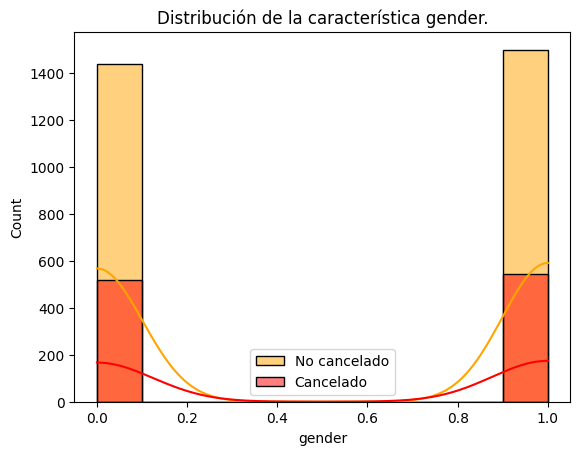

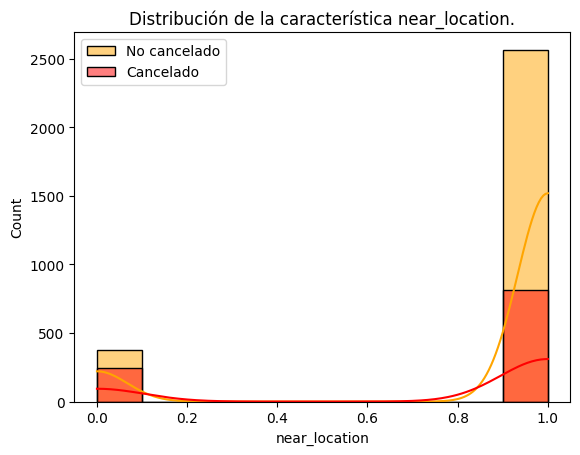

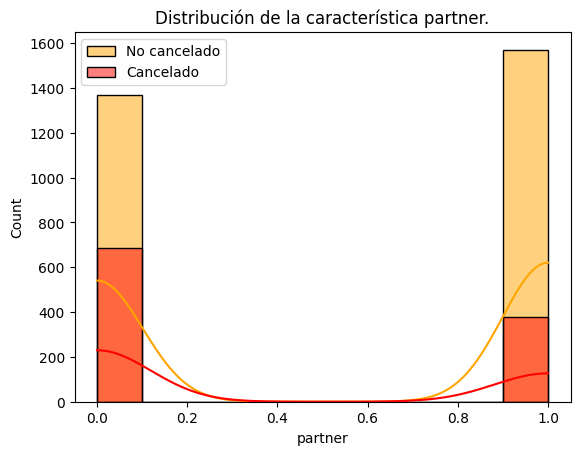

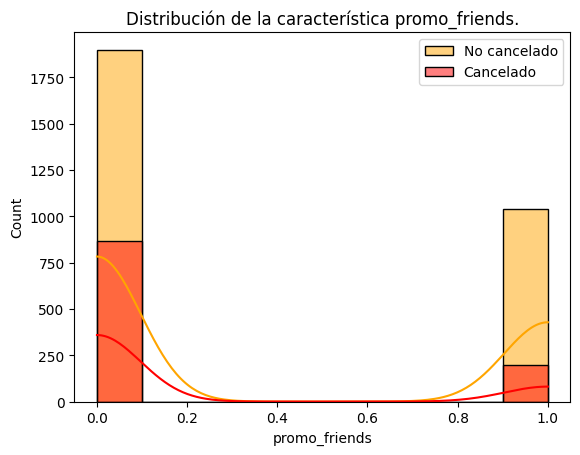

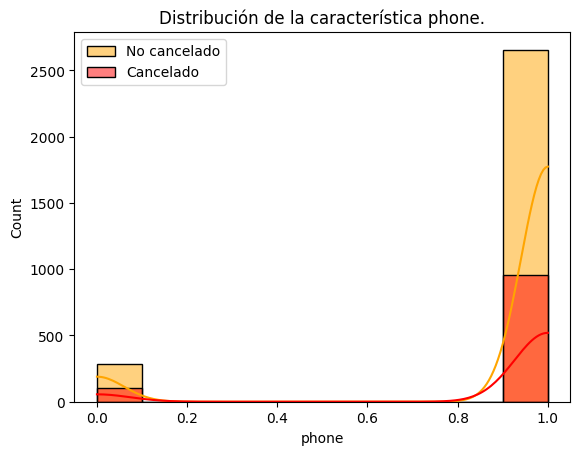

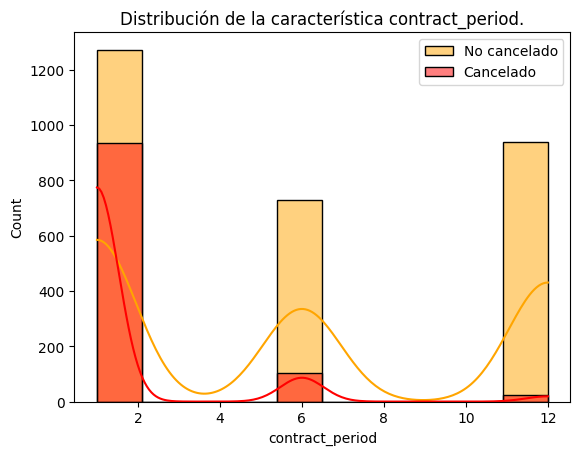

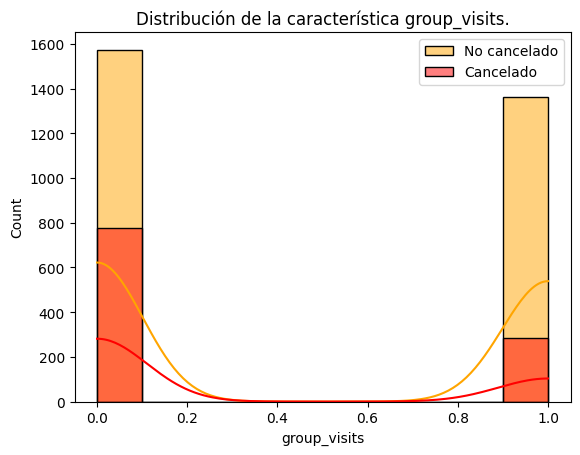

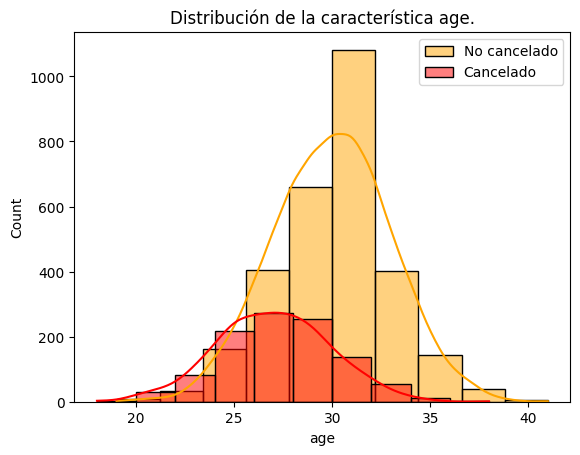

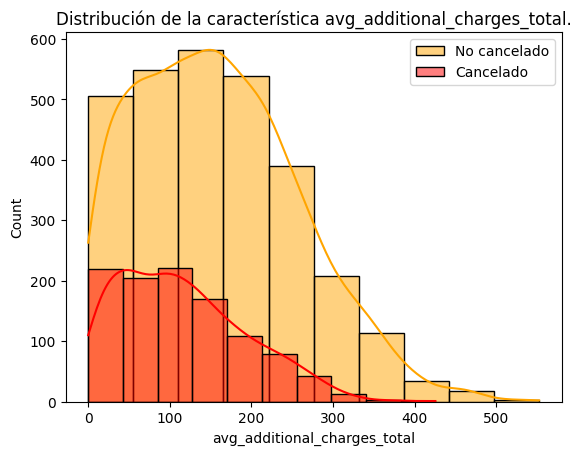

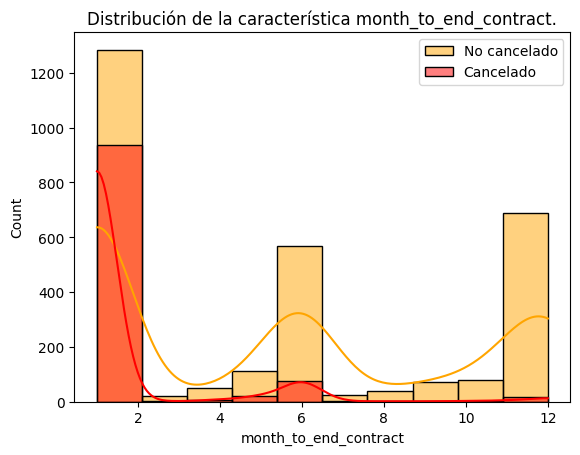

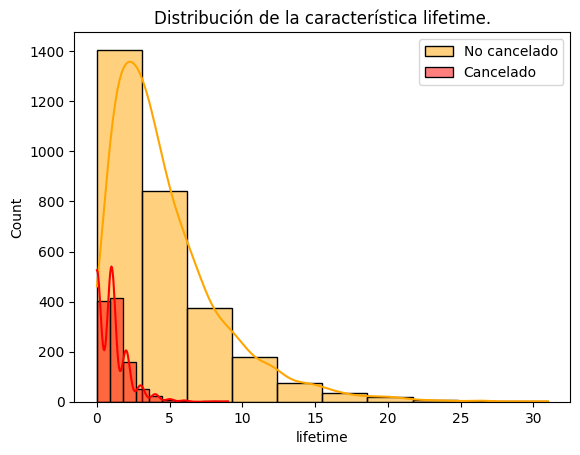

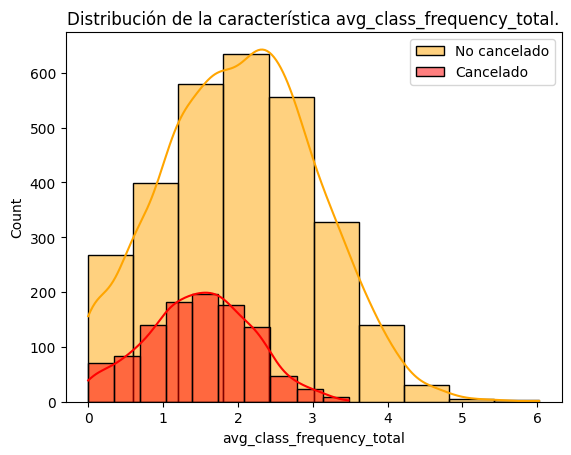

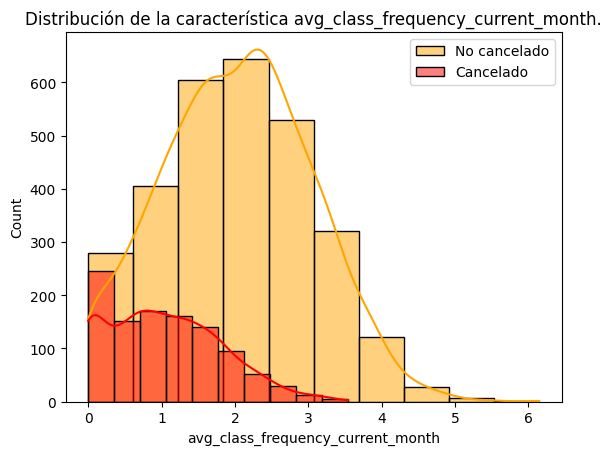

In [9]:
for col in data.drop('churn', axis=1).columns: 
    sns.histplot(x=data[data['churn']==0][col],color="orange",label="No cancelado",kde=True, bins=10)
    sns.histplot(x=data[data['churn']==1][col],color="red",label="Cancelado",kde=True, bins=10)
    plt.title(f"Distribución de la característica {col}.")
    plt.legend()
    plt.show()

Comprobamos que las proporción de usuarios que no han cancelado es mayor que los que ya cancelaron. Sin embargo, encontramos las siguientes observaciones sobre el comportamiento de los usuarios que han cancelado:
- Los usuarios no pertenecen a alguna empresa asociada o utilizaron un código promocional de amigo. Esto nos puede indicar que los descuentos pueden ser un factor importante.
- Las cancelaciones se dan cuando los usuarios tienen un contrato de periodo corto. Entre más larga sea la duración de su contrato, menos cancelaciones hay. De igual forma, las cancelaciones se dan más cuando queda un mes para terminar el contrato. 
- En su mayoría, estos usuarios no participa en sesiones grupales. 
- La edad de los usuarios que cancelan su membresía se distribuye alrededor de los 27 años, mientras que los usuarios que se quedan se distribuyen alrededor de los 31 años. 
- Si bien todos los usuarios tienen un periodo de vida "joven", la población de los usuarios que cancelan su membrecía se concentra en menos de 5 meses de vida.
- En general, las características que nos indican las visitas promedio a la semana y el gasto adicional promedio presentan una asimetría a la derecha más marcada para los usuarios que cancelaron que para los usuarios que mantienen su membresía.

### Correlación entre características

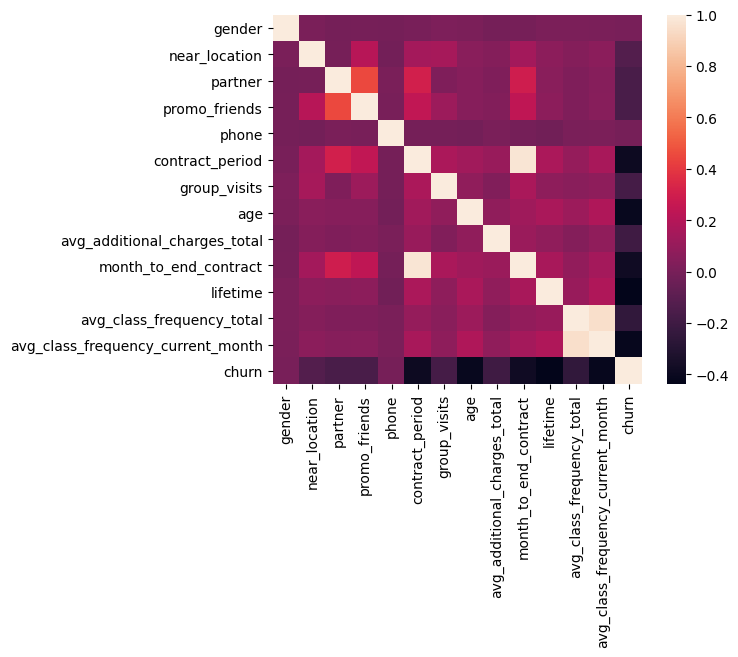

In [10]:
#Contruimos y mostramos la matriz de correlación
#calculando la matriz de correlacion
cm = data.corr()
#Creamos el gráfico
fig, ax = plt.subplots()
#Creamos un mapa de calor para mostrar
sns.heatmap(cm, annot=False, square = True) 
plt.show() #Mostramos

Notamos que las características que afectan a la característica objetivo presentan una correlación negativa, es decir, que se relacionan valores grandes(churn = 1) con valores pequeños. Comprobando lo que mencionamos anteriormente, cuando características como "contract_period", "month_to_end_contract", "lifetime", "avg_class_frequency_current_month" y "age" tienen valores "pequeños", la posibilidad de cancelar la membresía es mayor.

## Construcción del modelo de predicción.

En esta sección, se creará un modelo de clasificación binaria para clientes donde nuestra característica objetivo es si el usuario/a cancela su membresía el mes siguiente. Para ello, comenzaremos dividiendo los datos que tenemos para realizar el entrenamiento y la validación del modelo, utilizaremos una proporción de 80/20. 

Utilizaremos los métodos:
- **Regresión logística**.
- **Bosque aleatorio**.

In [11]:
#Dividimos los datos entre características y la variable objetivo:
#Características:
X = data.drop("churn",axis = 1)
y = data['churn']

#Dividimos los datos en conjuntos de entrenamiento y prueba con proporción 80 a 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Estandarizamos los datos:
scaler = StandardScaler() #Objeto StandardScaler
X_train_st = scaler.fit_transform(X_train) #entrenamos el scaler y transformamos la matriz del set de entrenamiento

#Estandarizamos la matriz de características para el set de prueba
X_test_st = scaler.transform(X_test)

In [12]:
#Modelo de regresión logística:
model_lr = LogisticRegression(random_state=0)

#Entrenamos
model_lr.fit(X_train_st,y_train)

#Realizamos predicciones
y_pred_lr = model_lr.predict(X_test_st)
#Calculamos la probabilidad de que un objeto pertenezca a la clase 1(cliente cancele su membresia)
y_prob_lr = model_lr.predict_proba(X_test_st)[:,1]

In [13]:
#Modelo de bosque aleatorio

model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

#Entrenamos
model_rf.fit(X_train_st, y_train)
#Realizamos predicciones
y_pred_rf = model_rf.predict(X_test_st)
#Calculamos probabilies
y_prob_rf = model_rf.predict_proba(X_test_st)[:,1]

In [14]:
#Creamos un dataframe para mostrar los resultados.
scores = pd.DataFrame()

scores['Modelo'] = ['Regresión Logística','Random Forest']
scores['Exactitud'] = [accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_rf)]
scores['Precisión'] = [precision_score(y_test, y_pred_lr),precision_score(y_test, y_pred_rf)]
scores['Recall'] = [recall_score(y_test, y_pred_lr),recall_score(y_test, y_pred_rf)]
display(scores.set_index('Modelo'))

,Exactitud,Precisión,Recall
Modelo,,,
Regresión Logística,0.9225,0.854167,0.828283
Random Forest,0.9150,0.838542,0.813131


Observamos que, por muy poco, el modelo creado por **Regresión Logística** presenta mejores resultados en todas las métricas respecto al modelo creado por **Random Forest**, obtuviendo muy buenos resultados para ambas donde se tiene más del 80% de respuestas correctas e inclso una exactitud mayor al 90%.

## Identificación de grupos.

En esta sección, crearemos e identificaremos clústeres de usuarios mediante el algoritmo K-means.
Comenzamos estandarizando los datos y preparando el algoritmo.

In [19]:
#estandarizamos los datos:
#data_st = scaler.fit_transform(data)
data_st = scaler.fit_transform(X)

#Establecemos el número de clústeres en 5
Km = KMeans(n_clusters = 5,random_state=0)
labels = Km.fit_predict(data_st) #Aplicamos a los datos y obtenemos los índices sugeridos por el algoritmo

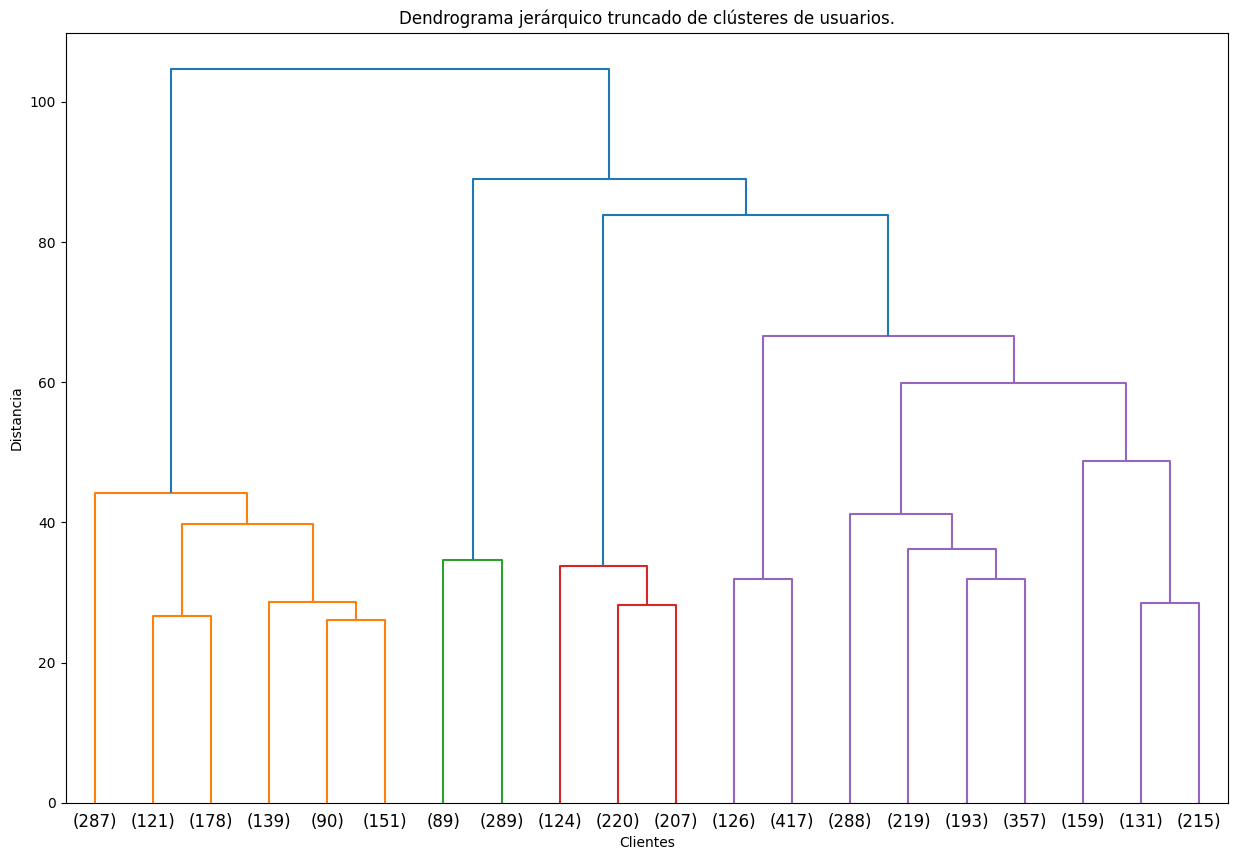

In [20]:
#Creamos el dendrograma:
linked = linkage(data_st, method = 'ward')
plt.figure(figsize=(15, 10))  
#dendrogram(linked, orientation='top')
dendrogram(linked, truncate_mode='lastp', p=20, orientation='top')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.title('Dendrograma jerárquico truncado de clústeres de usuarios.')
plt.show()

Creamos un dendrograma truncado a 20 grupos(clústeres) donde en el eje X se nos indica el número de usuarios presente en cada grupo y el eje Y la distancia entre grupos. Notamos que se tienen 4 grupos principales(por los colores), de manera que pudieramos definir el número de clústeres en 4 para el algoritmo KMeans pero seleccionaremos 5 como se nos indica en las instrucciones del proyecto. Cabe mencionar que se decidió truncar el dendrograma para una renderización más rápida y mejor apreciación del número de clientes por grupo.

In [21]:
#Almacenamos las etiquetas de los clústeres en nuestro DF original. 
data['cluster_km'] = labels
# Obtenemos los valores medios de las características para los clústeres
mean_val = data.groupby(['cluster_km']).mean()
print("Valores medios de las características para cada cluster:")
display(mean_val)
print("Tasa de cancelación para cada cluster:")
display(round(mean_val['churn']*100,2))

Valores medios de las características para cada cluster:


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Tasa de cancelación para cada cluster:


cluster_km
0     2.77
1    26.75
2    44.36
3    51.43
4     6.80
Name: churn, dtype: float64

Observamos que:
- Categorías como "gender" y "phone" prevalencen como características que no determinan el comportamiento de un grupo, en los 5 clústeres se obtuvieron valroes bastante cercanos. 
- En el grupo 2 están agrupados todos los usuarios que no acuden a una sucursal de su localidad.
- El grupo 3 es el que tiene la mayor media de cancelación con un 52%, notamos que este grupo presenta valores mínimos en la mayoría de las características presentadas. Con lo que comprobamos lo mencionado en la matriz de correlación. 
- Se caracterizaron 2 grupos de usuarios con una mínima tasa de cancelación:
    - El grupo 0 es el que tiene menor tasa de cancelación con solo un 2.77%. Notamos que este grupo presenta una media bastante alta en los meses de contrato restante, cargos adicionales, visitas grupales, periodo de contrato, empresas afiliadas y código promocional de amigo. 
    - El grupo 4 es el segundo con menor tasa de cancelación con un 6.8%. Este grupo se caracteriza por tener una alto promedio de visitas a la semana, un tiempo de vida y gastos adicionales elevados. No tienen códigos promocionales o son de empresas afiliadas, el promedio de tiempo para terminar contrato es de 2.6 y tienen la media de edad más alta de todos los grupos. 

Podemos concluir que se formaron 2 pares de grupos para los usuarios que cancelaron y no su membresía. El grupo 0 y 4, corresponde a los grupos de usuarios con menor tasa de cancelación y los grupos 2 y 3 son los que tienen mayor tasa de cancelación. Lo interesante de las medias de las características de estos grupos es que complementan muy bien uno del otro. 


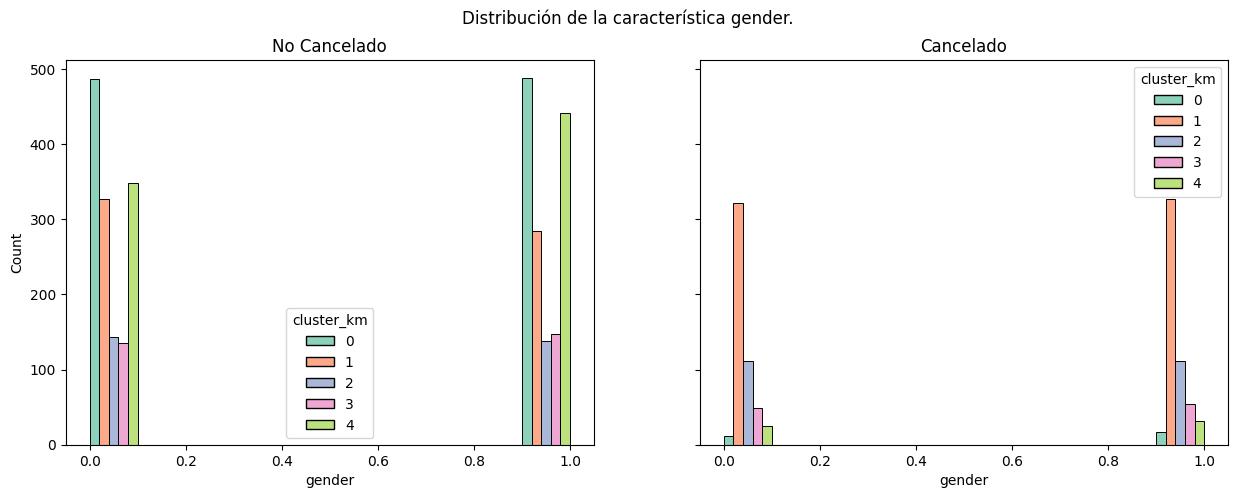

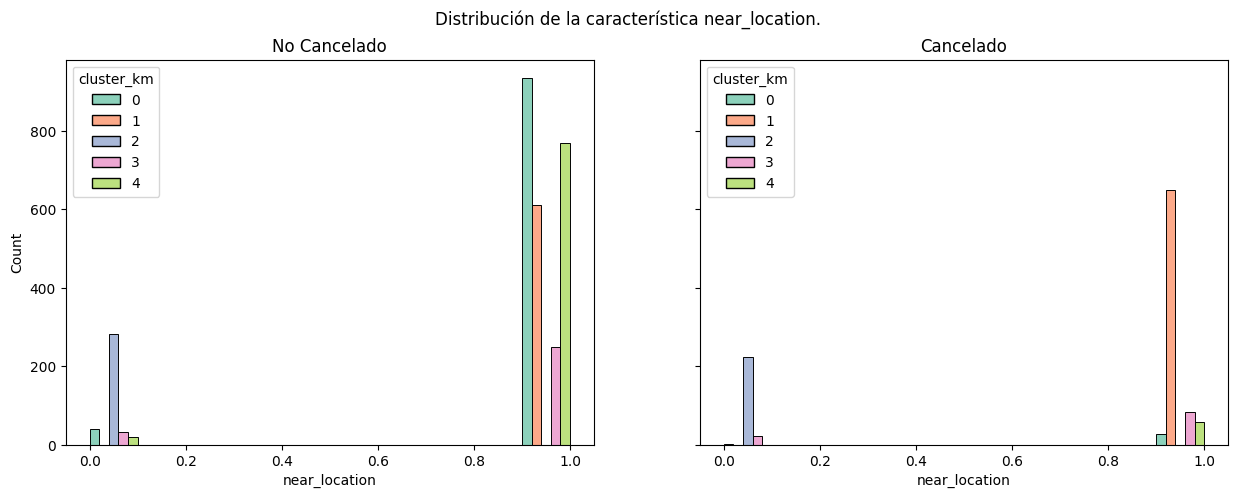

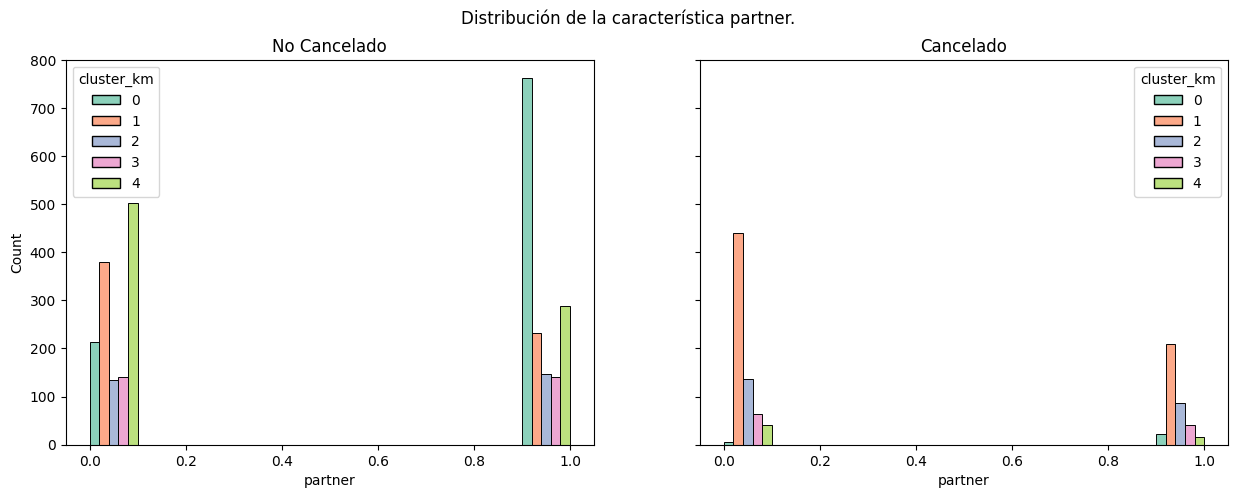

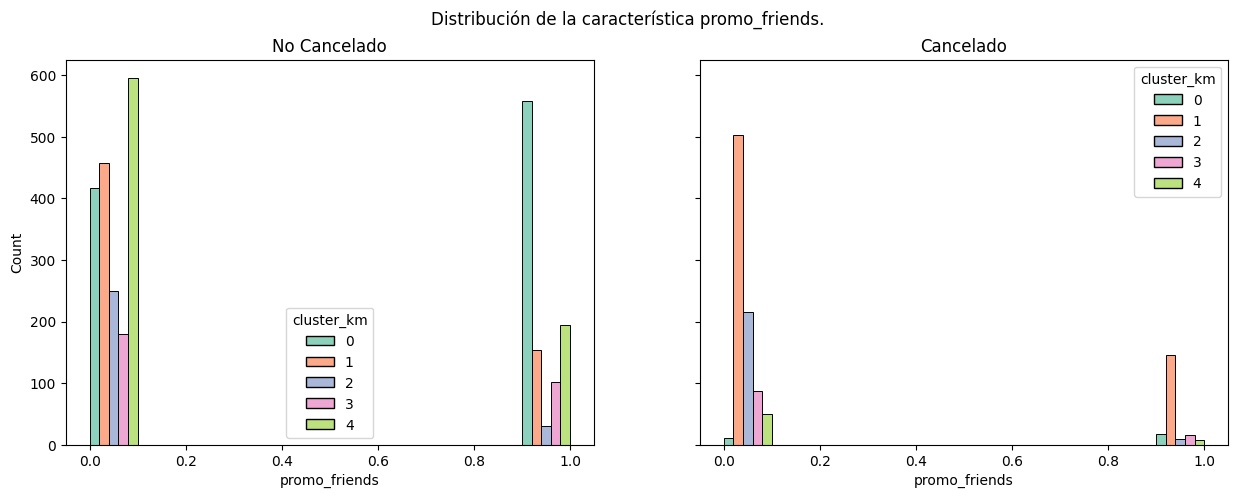

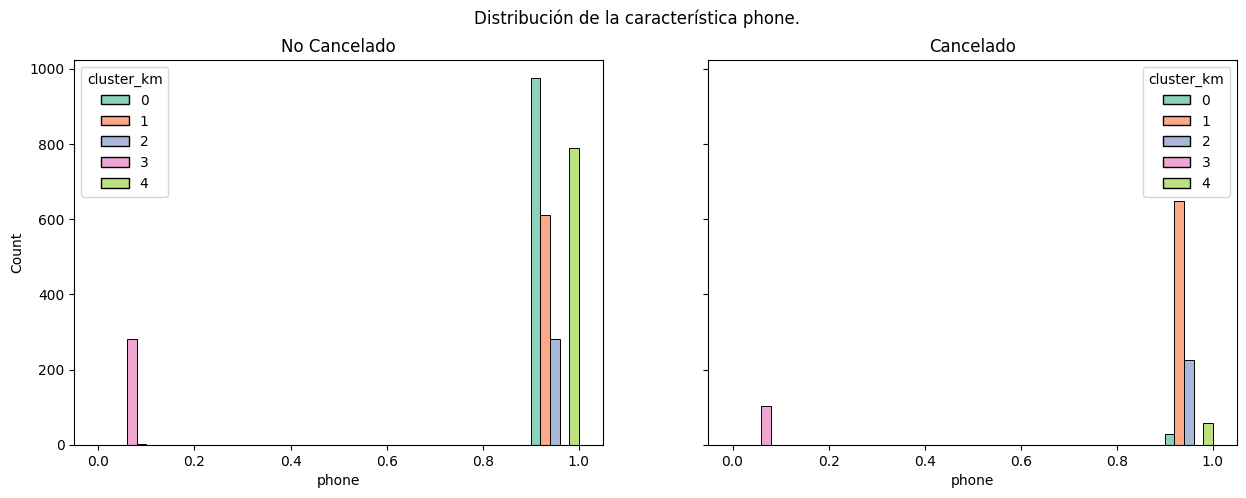

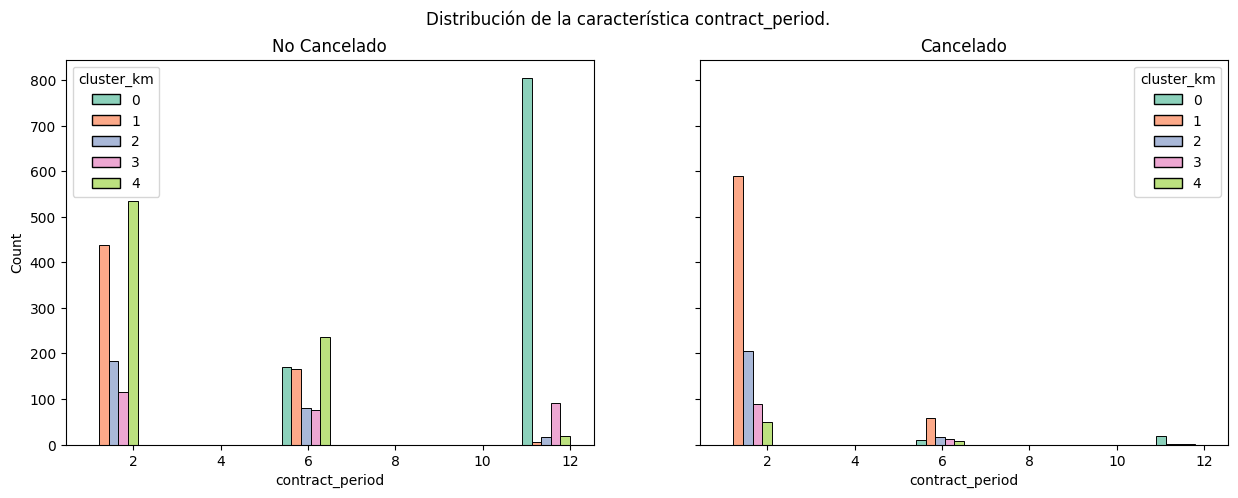

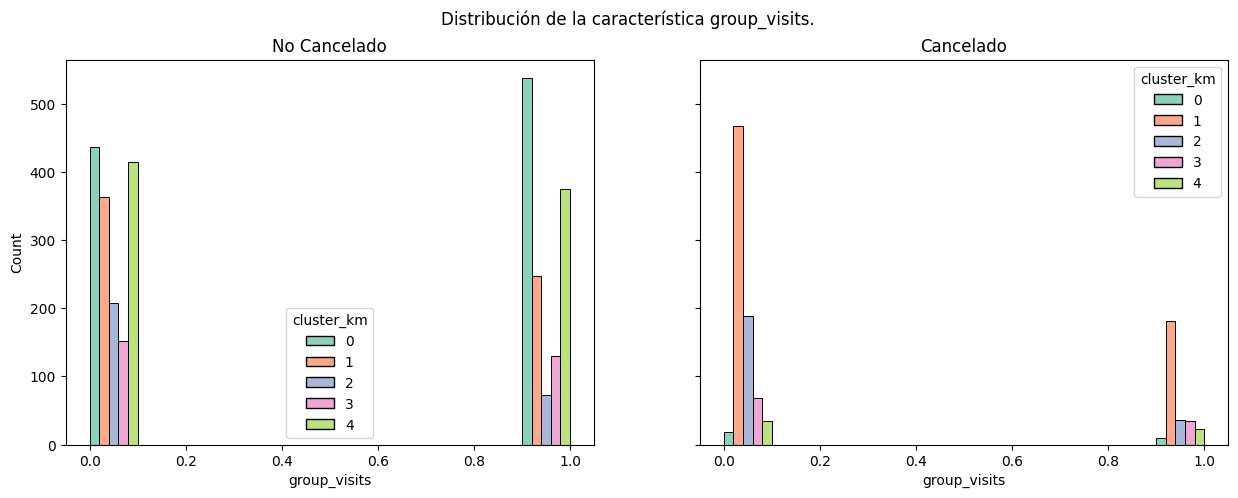

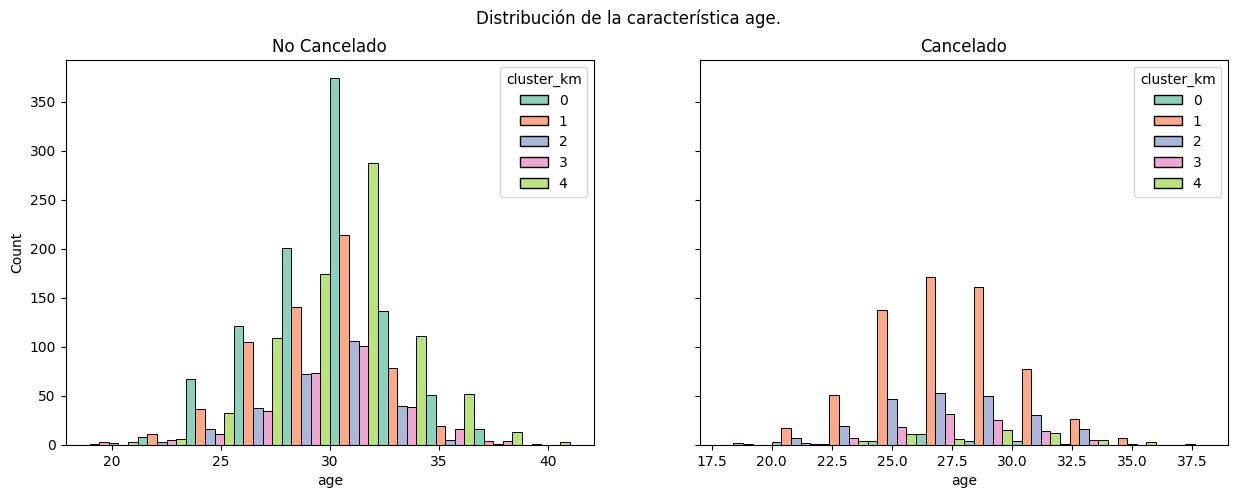

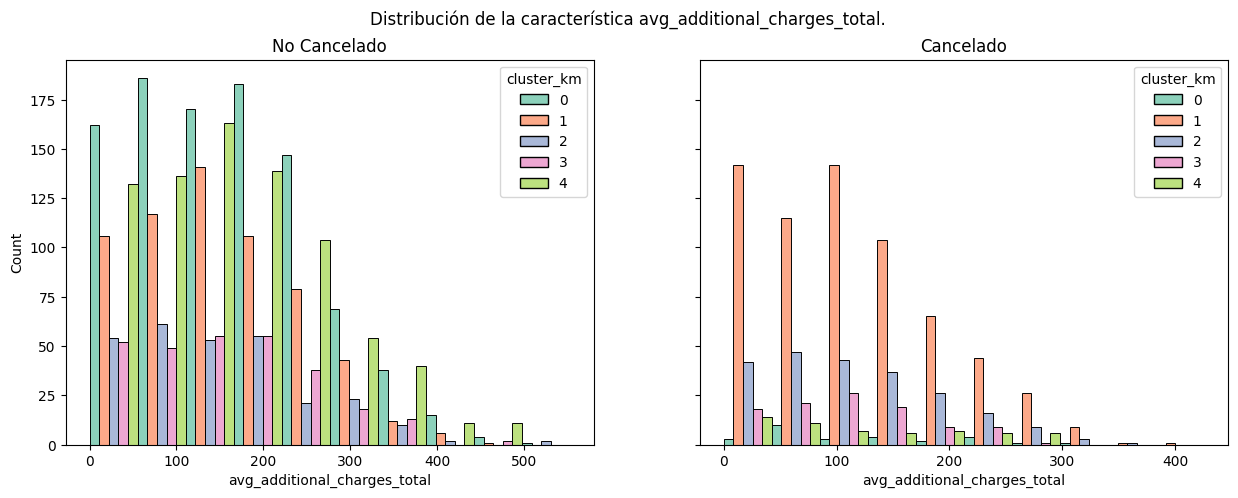

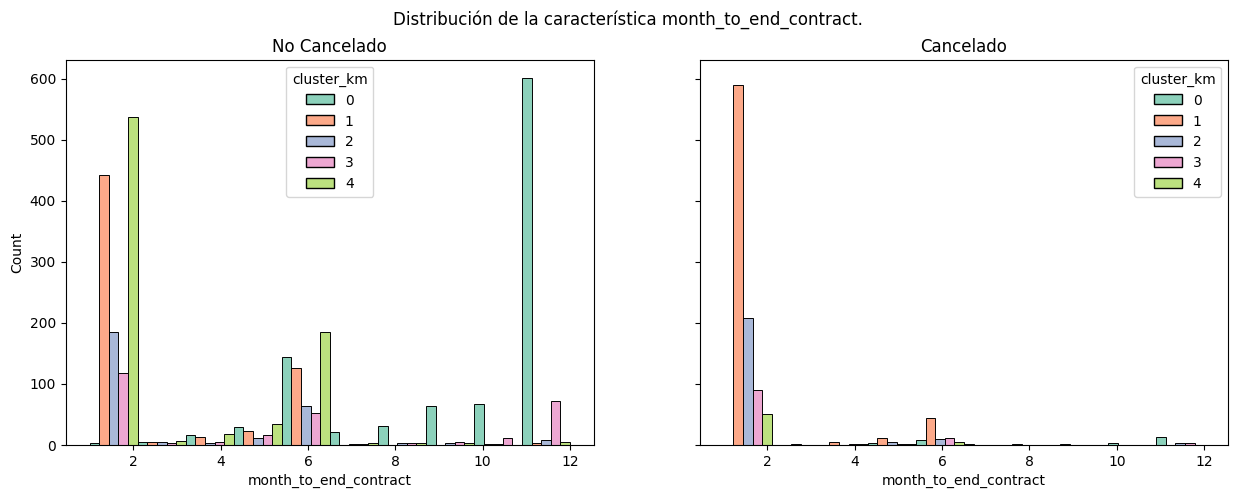

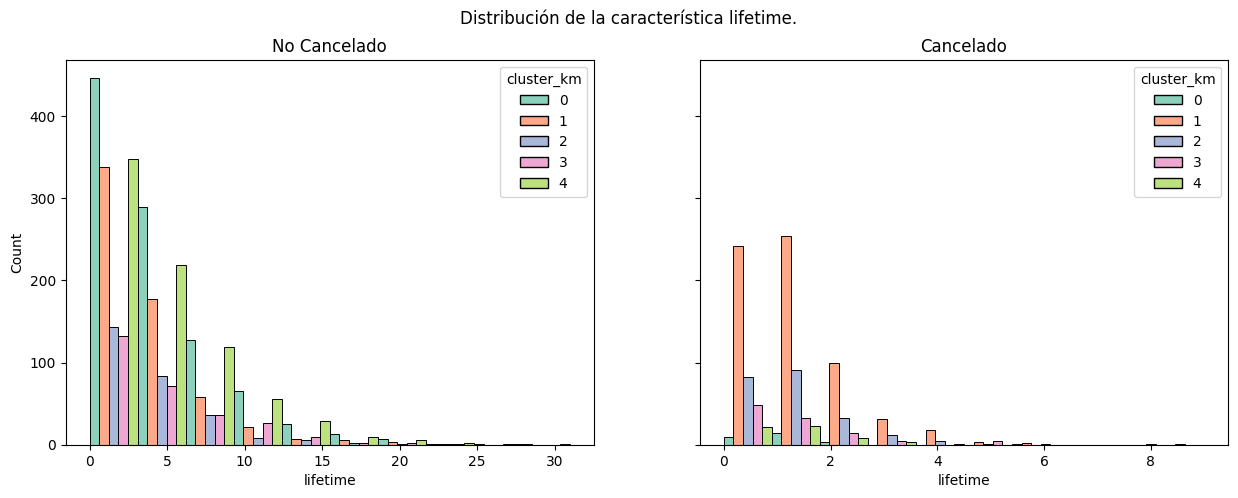

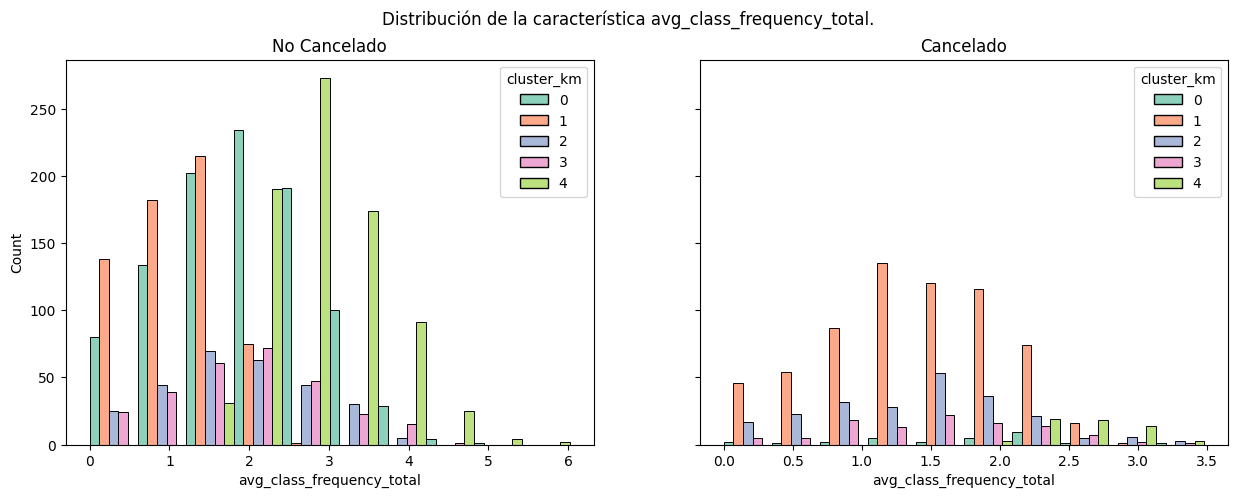

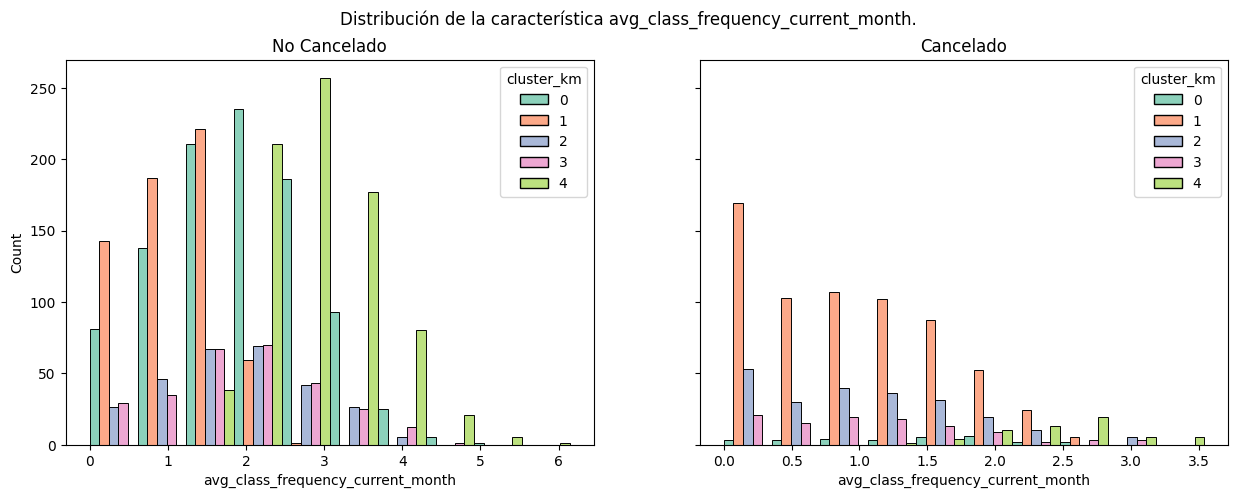

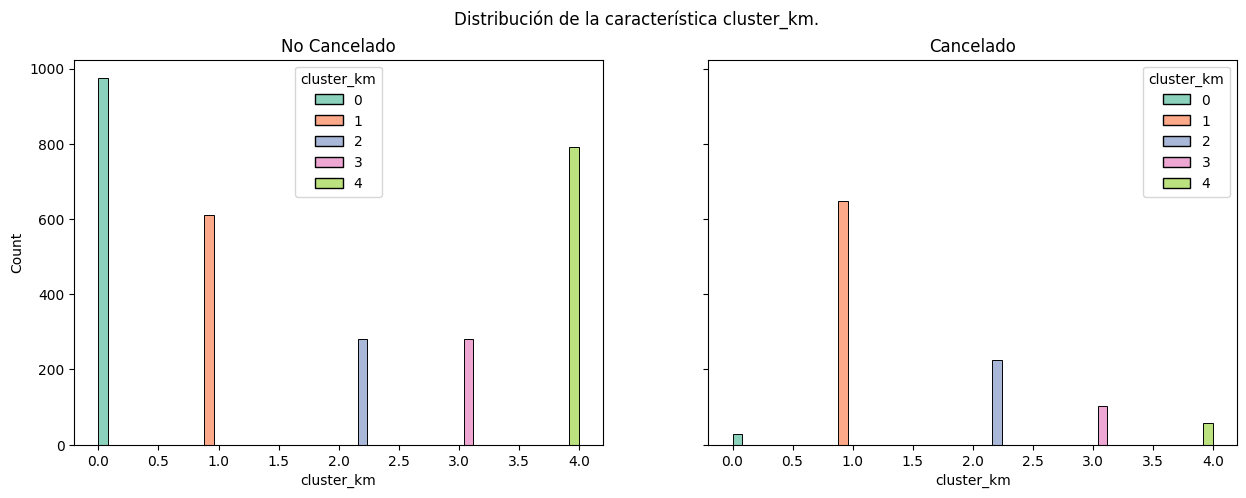

In [18]:
for col in data.drop('churn', axis=1).columns: 
    fig, axes = plt.subplots(1, 2,sharey=True, figsize=(15,5))
    fig.suptitle(f"Distribución de la característica {col}.")
    #No cancelado
    sns.histplot(ax=axes[0],x=data[data['churn']==0][col],hue=data['cluster_km'],palette='Set2',bins=10,multiple='dodge')
    axes[0].set_title("No Cancelado")
    #ancelado
    sns.histplot(ax=axes[1],x=data[data['churn']==1][col],hue=data['cluster_km'],palette='Set2',bins=10,multiple='dodge')
    axes[1].set_title("Cancelado")
    #sns.displot(x=data[col],hue=data['cluster_km'],palette='pastel')
    #plt.title(f"Distribución de la característica {col}.")
    #plt.legend()
    #plt.show()


Gracias a los histogramas podemos comprobar y complementar la información dada por la media de las características para cada clúster. 

- Los usuarios que mantienen sus membresías tienden a tener contratos muy largos(12 meses) o muy cortos(2 meses). 
- Las cancelaciones se tienden a dar cuando quedan 2 o menos meses restantes.
- La población de los grupos con tasa de cancelación baja se distribuye normalmente alrededor de los 30 años, mientras que los grupos con una tasa más alta de cancelación, se distribuyen normalmente alrededor de los 27 años. 

- El grupo 2 es un perfil de usuario con una alta tasa de cancelación y su característica más fuerte es que los usuarios no viven cerca de su sucursal de preferencia.

- El grupo 1 es un punto intermedio ya que tiene una tasa de cancelación media y comparte características con los grupos que tienen una cancelación alta y una baja. Esto hace difícil caracterizar a el comportamiento de los usuarios y probablemente sí usamos 4 clústeres en lugar de 5, este grupo se diluya en los restantes que tienen un comportamiento más marcado.


## Conclusiones y recomendaciones.

En este análisis pudimos encontrar información muy valiosa sobre los usuarios de la compañía donde destaca:

- El análisis exploratorio nos mostró que se tiene una clientela de adultos jóvenes (el cliente más longevo tiene 41 años) y no generan antigüedad ya que el 75% de los clientes tiene un tiempo de vida hasta de 5 meses y son contados los que llevan siendo clientes. Así también, los usuarios que cancelan su membresía en general no utilizan algún tipo de descuento al momento de contratar el servicio, contratan solo un mes, casi no participan en sesiones grupales y suelen tener alrededor de 27 años. 

- Las características que más afectan a la variable objetivo(si un cliente cancelará su servicio o no) generan una correlación negativa, es decir, entre menores valores presenten la probabilidad que cancelen es mayor. Por ejemplo, contratos cortos, poca participación en clases o visitas a la semana y una edad más joven aumentan más la probabilidad de cancelación del servicio. Así, se construyeron modelos de **regresión logística** y **bosque aleatorio**, donde ambos presentaron buenos valores en sus métricas de exactitud, precisión y recall. Sin embargo, el modelo de **regresión logística** fue el que mostró mejor desempeño. 

- La identificación de grupos generó 2 pares de grupos principales, un par para usuarios con baja tasa de cancelación y otro par para una alta tasa de cancelación, lo cual nos confirmó las suposiciones dadas en el análisis exploratorio de datos: Si las características presentan valores bajos, la tasa de cancelación aumenta. Los pares de grupos nos entregan 2 tipos de usuarios con características diferentes para cada caso. Por ejemplo, en el grupo con baja tasa de cancelación tenemos los usuarios que utilizaron códigos promocionales/pertenecen a una empresa asociada y los que no presentan ningún tipo de descuento. 

Recomendaciones generales:
- Al tener una clientela joven se puede generar estrategias de publicidad enfocadas en atraer clientes de esta demografía.
- Son contados los clientes que se quedan más de 6 meses, por lo que es necesario conocer las razones por las cuales se están yendo y no generan una antigüedad. Esto se puede llegar a combatir creando programas de recompensas o "loyalty programs" donde los clientes ganen descuentos en sus próximas renovaciones o en los servicios adicionales que ofrece el gimnasio.
- Los clientes que no utilizaron descuentos y no tienen una participación frecuente en los servicios tienden a contratar solo un mes y terminan cancelando. De esta forma, se necesita poner atención a los usuarios nuevos, empezar a ir al gimnasio puede ser estresante y hacer que cancelen su membresía. Se pueden generar infografías enfocadas en estos usuarios, sesiones de asesoramiento con coachs para crear sus rutinas, etc. 